# 회귀 트리
비선형 회귀 방식 중 하나 (결정 트리를 기반으로 한 회귀 방식)
노드를 분할해가며, 분할한 노드에 소속된 데이터 값의 평균값을 구함. 리프 노드 결정값으로 할당

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# data set load
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF["PRICE"] = boston.target
y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("Negative MSE scores:", np.round(neg_mse_scores, 2))
print("RMSE scores:", np.round(rmse_scores, 2))
print("average RMSE:", avg_rmse)

Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
RMSE scores: [2.81 3.63 4.54 6.8  4.34]
average RMSE: 4.422538982804892


In [5]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("###", model.__class__.__name__, "###")
    print("average RMSE:", avg_rmse)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

### DecisionTreeRegressor ###
average RMSE: 5.977957424580515
### RandomForestRegressor ###
average RMSE: 4.422538982804892
### GradientBoostingRegressor ###
average RMSE: 4.26899822168126
### XGBRegressor ###
average RMSE: 4.251080362834295
### LGBMRegressor ###
average RMSE: 4.646441191925675


<AxesSubplot:>

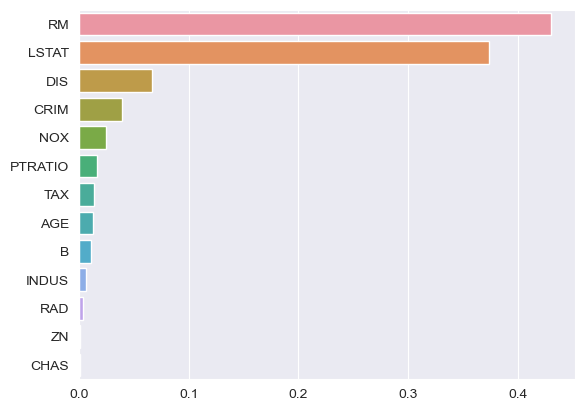

In [7]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

### Tree Regressor 예측값 판단의 시각화

(100, 2)


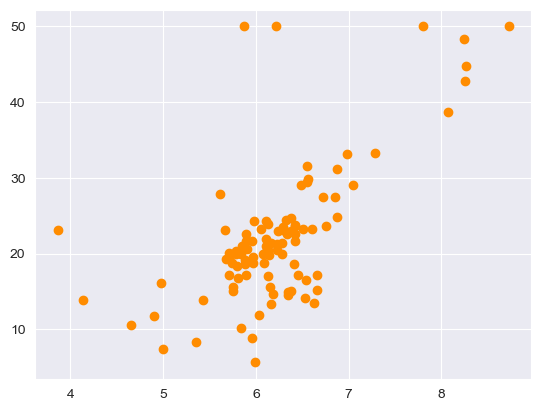

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[["RM", "PRICE"]]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

# create Regressor
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# test dataset
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# fit and predict
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

prd_lr = lr_reg.predict(X_test)
prd_rf2 = rf_reg2.predict(X_test)
prd_rf7 = rf_reg7.predict(X_test)

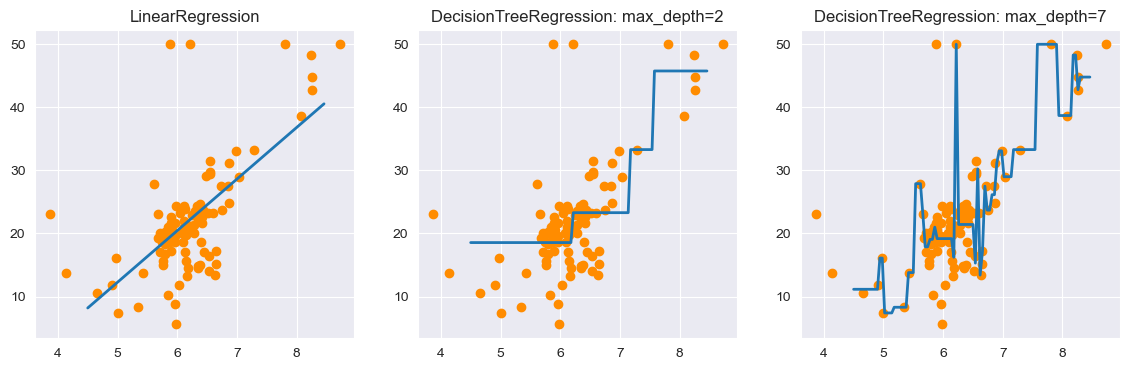

In [11]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# visualize expectation
ax1.set_title('LinearRegression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, prd_lr, label="linear", linewidth=2 )

ax2.set_title('DecisionTreeRegression: max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, prd_rf2, label="max_depth:3", linewidth=2 )

ax3.set_title('DecisionTreeRegression: max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, prd_rf7, label="max_depth:7", linewidth=2)